#### Import necessary libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
#load dataset
df = pd.read_csv("../data/processed/cleanedcredit.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


#### Split dataset into Training and Testing set

In [4]:
#Features (X) and Target (y)
X = df.drop(columns = ["Class"])
y = df["Class"]

In [5]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(f"Training data size: {len(X_train)}")
print(f"Testing data size: {len(X_test)}")

Training data size: 226980
Testing data size: 56746


#### Handle imbalance classes

In [6]:
#Initialize SMOTE
smote = SMOTE(random_state = 42)

In [7]:
# Apply SMOTE to training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print(f"Training data after SMOTE: {len(X_train_smote)}")

Training data after SMOTE: 453194


#### Train model

In [10]:
#Train logistic model
model = LogisticRegression()
model.fit(X_train_smote, y_train_smote)

LogisticRegression()

#### Evaluate the model performance

Model Accuracy: 0.98

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56656
           1       0.05      0.89      0.10        90

    accuracy                           0.98     56746
   macro avg       0.53      0.93      0.54     56746
weighted avg       1.00      0.98      0.99     56746



Text(0.5, 1.0, 'Confusion Matrix')

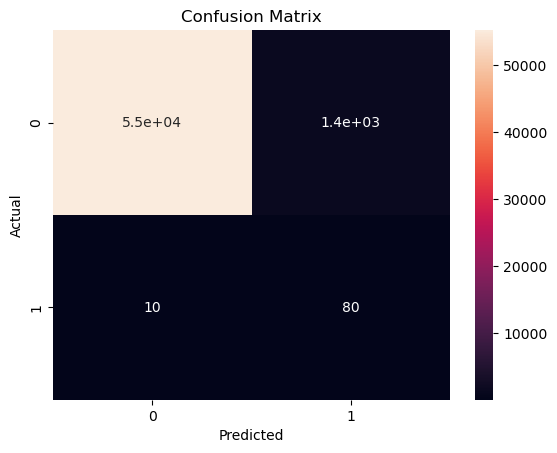

In [14]:
y_pred = model.predict(X_test)

#calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}\n")

#display classification report
print(classification_report(y_test, y_pred))

#plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, )
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")